# Loading data

Image data acquired in microscopy are stored in various formats: TIF, LSM, CZI, LIF, ND2
We'll use the imageanalysis kernel we have created earlier and we assume here that we are working in the example folder ( use %cd in the notebook to change directory ).

In [ ]:
%cd  C:\Users\jeromeb\Documents\GitHub\Analysis-of-Microscopy-Images-in-Python\examples

Some image reader will return a numpy array which represents array of values on a regular grid. Other might return a Pillow object representing an image object.

## Loading TIF
For loading TIF images, we can use the module tifffile. It also supports LSM (Zeiss), OME-TIF, ImageJ hyperstacks, etc.
If installing modules manually, type in the prompt the command: 
```bash
conda install tifffile
```
Let's load the all content of the file into a numpy array:

The shape of the array is [depth x channels x height x width] (25, 2, 400, 400)


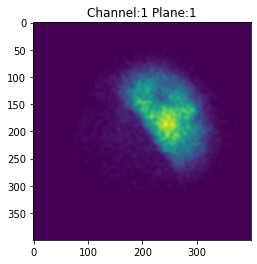

In [8]:
# We first load in python useful modules for loading and displaying images
import tifffile
import matplotlib.pyplot as plt

# Let's set the name of the file we want to open
filename = '../data/example.tif'

# We use the tifffile module to read the image from disk
img = tifffile.imread(filename)

# Let's check the shape/size of the image (note the order of the planes)
print("The shape of the array is [depth x channels x height x width]", img.shape)

# We select the middle plane and the second channel (indices starts at 0)
middle_plane_index = round(img.shape[1] / 2)
plane = img[middle_plane_index,1,:,:]
plt.imshow(plane)
plt.title('Channel:{ch} Plane:{z}'.format(ch=1,z=middle_plane_index))
plt.show()

## Nikon ND2 files
Nikon ND2 files can be loaded using the python module nd2reader (https://rbnvrw.github.io/nd2reader/). The module is available on the channel conda-forge. Add the conda-forge channel using the following command:
```bash
conda config --add channels conda-forge
```
and install it with:
```
conda install nd2reader
```
Now we can read an image from ND2 files using:

Image size: {'x': 1952, 'y': 1952, 'c': 3, 't': 1}


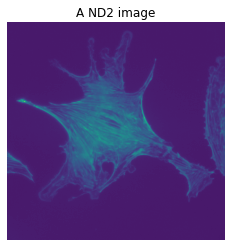

In [49]:
# We load first the nd2reader module
from nd2reader import ND2Reader
import matplotlib.pyplot as plt

# We are creating a reader for the nd2 image
with ND2Reader('../data/example.nd2') as images:
  
  # Let's print out the image size
  print('Image size:', images.sizes)
  
  # We define the axis on which we iterate the 2D planes
  images.iter_axes = 'c'

  # Let finally show the 2nd channel of the image
  plt.imshow(images[1])
  plt.title('A ND2 image')
  plt.axis('off')

## Leica LIF files
For Leila LIF files we can use readlif https://pypi.org/project/readlif/ . This module needs to be installed using pip instead of conda using 
```
pip install readlif
```
We use the function get_frame from readlif to get a pillow image.  
Now let's read a LIF file.

Image dimensions: Dims(x=216, y=216, z=1, t=1, m=1)


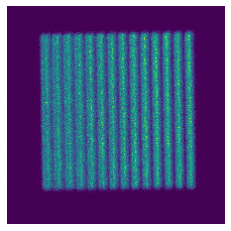

In [57]:
# Let's load the reader from the readlif module
from readlif.reader import LifFile

# We create an object containing the image data
lif = LifFile('../data/example.lif')

# Let's get the first image
img_0 = lif.get_image(0)
print("Image dimensions:", img_0.dims)

# We extract a 2D frame from the image
frame = img_0.get_frame(z=0,t=0,m=0)

# And finally display the 2D pillow image. 
plt.imshow(frame)
plt.axis('off')
plt.show()

## Zeiss CZI files
Another format that you may encounter is the Zeiss CZI file format. 

You can install the czifile module using ```conda install -y -c conda-forge czifile```. Let's open now a CZI file using the czifile module.

The module gives access to an numpy array

Shape of the array : (1, 2, 1, 1, 1024, 1024, 1)


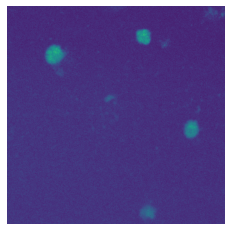

In [58]:
import czifile

image =  czifile.imread('../data/example.czi')
print("Shape of the array :" , image.shape)

plt.imshow(image[0,0,0,0,:,:,0])
plt.axis('off')
plt.show()

We can also use the module from the Allen Institute: aicspylibczi based on libczi from Zeiss. For this we need to install it with ``` pip install  aicspylibczi ```

Size of the image  (1, 1, 2, 1, 1024, 1024)


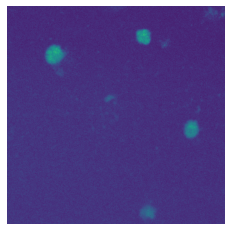

In [22]:
import numpy as np
from aicspylibczi import CziFile
from pathlib import Path
import matplotlib.pyplot as plt

pth = Path('../data/example.czi')
czi = CziFile(pth)
print("Size of the image ", czi.size)
img, shp = czi.read_image()
plt.imshow(img[0,0,0,0,:,:])
plt.axis('off')
plt.show()

## Using bioformat
Bioformat-python enable to load most image format using javabridge and bioformat. We can install bioformat-python with pip but you'll need to install Oracle JDK 1.6 or later first (https://www.oracle.com/uk/java/technologies/javase-jdk15-downloads.html).
```
pip install python-bioformat
```
Now let's open an image using bioformat. We need to start a virtual machine first and not forget to stop it when finished.


In [21]:
import javabridge
import bioformats 

javabridge.start_vm(class_path=bioformats.JARS)
img = bioformats.load_image('../data/example.tif', c=0, z=0, t=0)
javabridge.kill_vm()
plt.imshow(img)

Traceback (most recent call last):
  File "C:\Users\jeromeb\.conda\envs\imageanalysis\lib\site-packages\javabridge\jutil.py", line 286, in start_thread
    env = vm.create(args)
  File "_javabridge.pyx", line 654, in _javabridge.JB_VM.create
RuntimeError: Failed to create Java VM. Return code = -5
Failed to create Java VM


RuntimeError: Failed to start Java VM